# Machine Learning Introduction

Today we switch from data processing to the data analysis questions. 

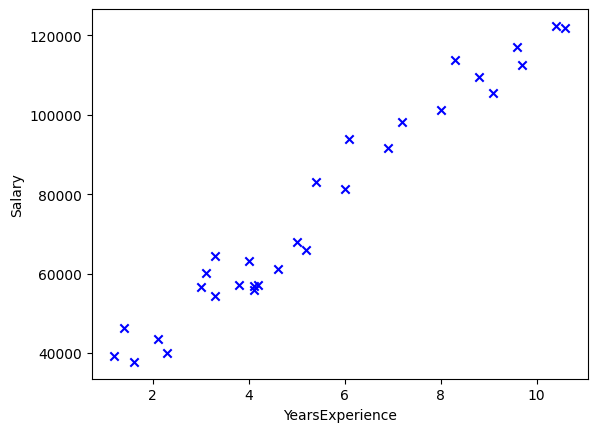

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt
    # plt.show()

# build_plot('../resources/telecom_cus.csv', 'age', 'income')
# build_plot('../resources/china_gdp.csv', 'Year', 'Value')
# build_plot('../resources/cust_segmentation_Data.csv', 'Income', 'Other Debt') 
# build_plot('../resources/heart.csv', 'chol', 'trtbps')
# build_plot('../resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions')

build_plot('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary').show()


## Simple Example

Here we have a simple example of dependency between years of experience of employees and their salaries. Can we predict the second parameter based on the value of first parameter.

We can assume that the dependency follows the linear model.

$$y\approx \theta_1 \cdot x + \theta_2$$

Here $\theta_1$ is the “slope” of the line, and $\theta_2$ is the intercept.

Can we make predictions of data? 

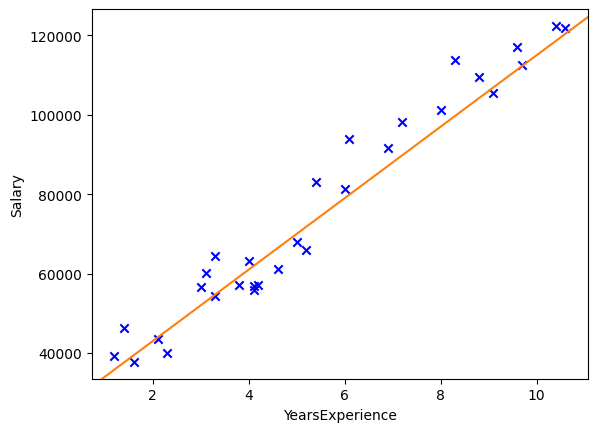

In [4]:
import numpy as np

def build_line(plt, theta):
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim)

plt = build_plot('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')
build_line(plt, np.array([9000, 25000]))

## Gradient descent 

Let's suppose the predicted salary fits a linear model. How can we finc $\theta$? 

Many possibilities, but natural objective is to minimize some difference between this line 
and the observed data, e.g. squared loss:

$$E(\theta) = \sum_{i}(\theta_{1}*x_{i} + \theta_{2} - y_{i} )^{2}$$

Now we have to find the parameters, that minimize the value of function $E(\theta)$.

Best way of finding the values for function $f(x)$, in which it's value is minimal, is via finding the derivative. We begin at some point, and modify the input value in the direction of the negative derivative. For the case of multivariable functions we shall use partial derivatives.

To find a good value of $\theta$, we can repeatedly take steps in the direction of the 
negative derivatives for each value. Repeat:

$$ \theta_{1} := \theta_{1} - \alpha \frac{\delta}{\delta \theta_{1}} E(\theta_{1}, \theta_{2})$$

$$ \theta_{2} := \theta_{2} - \alpha \frac{\delta}{\delta \theta_{2}} E(\theta_{1}, \theta_{2})$$

where $\alpha$ is some small positive number called the step size.
This is the gradient decent algorithm, the workhorse of modern machine learning.

Note: 

$$\frac{\delta}{\delta \theta_{1}} E(\theta_{1}, \theta_{2}) = \sum_{i}2(\theta_{1}*x_{i} + \theta_{2} - y_{i} )*x_{i}$$

$$\frac{\delta}{\delta \theta_{2}} E(\theta_{1}, \theta_{2}) = \sum_{i}2(\theta_{1}*x_{i} + \theta_{2} - y_{i} )$$


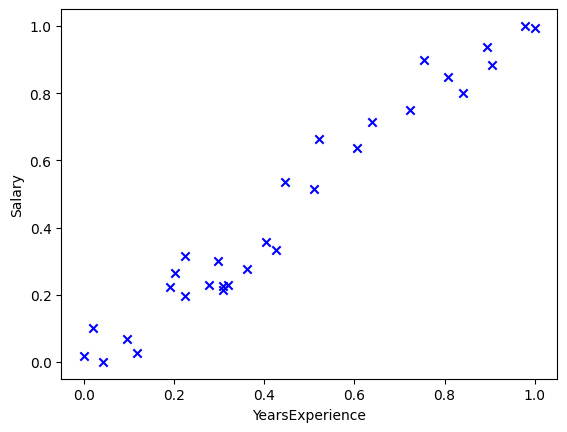

In [5]:
# do not forget to first normalize the data:

def build_plot_normalized(file_path, x, y):
    data = pd.read_csv(file_path)
    x_nor = (data[x] - min(data[x])) / (max(data[x]) - min(data[x]))
    y_nor = (data[y] - min(data[y])) / (max(data[y]) - min(data[y]))
    plt.scatter(x_nor, y_nor, c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot_normalized('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary').show()

## Visualizing the gradient descent:

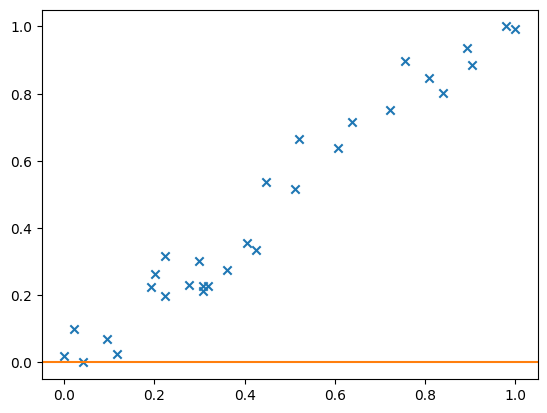

In [5]:
def get_data(file_path, x_name, y_name):
    data = pd.read_csv(file_path)
    return data[x_name], data[y_name]

def normalize_data(x):
    x_normalized = (x - min(x)) / (max(x) - min(x))
    return x_normalized

def gradient_descent(x, y, iters, alpha):
    theta = np.array([0., 0.])
    for t in range(iters):
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return theta 

def plot_fit(x, y, theta):
    plt.scatter(x, y, marker = 'x')
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim) 

x, y = get_data('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')
x_normalized, y_normalized = normalize_data(x), normalize_data(y)

#first iteration
theta = gradient_descent(x_normalized, y_normalized, 0, 0.1)
plot_fit(x_normalized, y_normalized, theta)

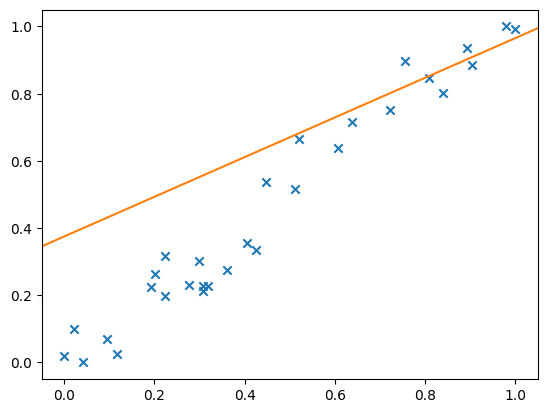

In [6]:
theta = gradient_descent(x_normalized, y_normalized, 1, 1.0)
plot_fit(x_normalized, y_normalized, theta)

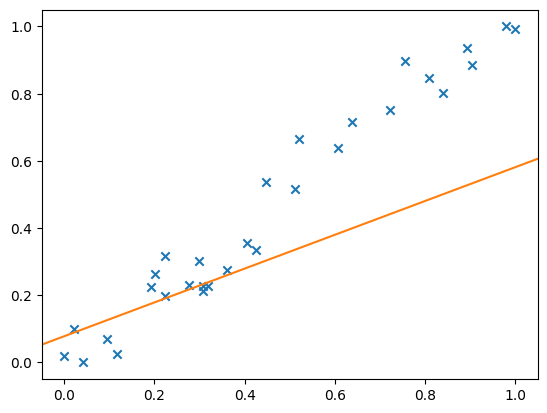

In [7]:
theta = gradient_descent(x_normalized, y_normalized, 2, 1.0)
plot_fit(x_normalized, y_normalized, theta)

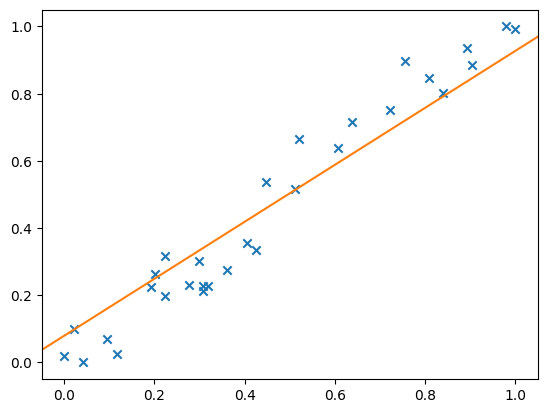

In [8]:
theta = gradient_descent(x_normalized, y_normalized, 5, 1.0)
plot_fit(x_normalized, y_normalized, theta)

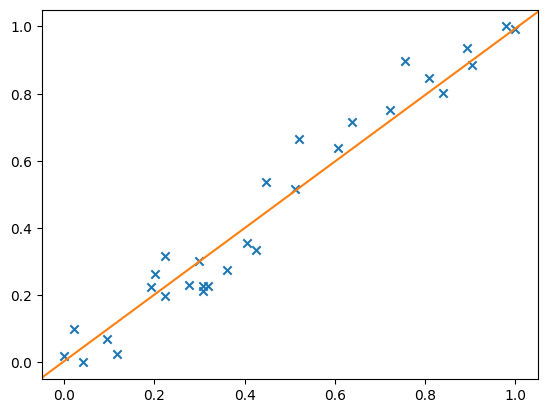

In [9]:
theta = gradient_descent(x_normalized, y_normalized, 10, 1.0)
plot_fit(x_normalized, y_normalized, theta)

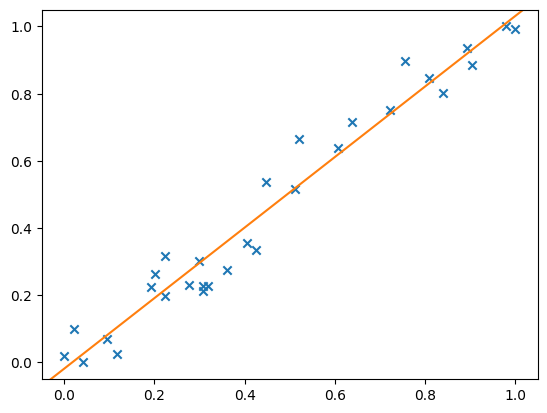

In [10]:
theta = gradient_descent(x_normalized, y_normalized, 100, 1.0)
plot_fit(x_normalized, y_normalized, theta)

## Error vs Iteration:

Text(0, 0.5, 'Average error')

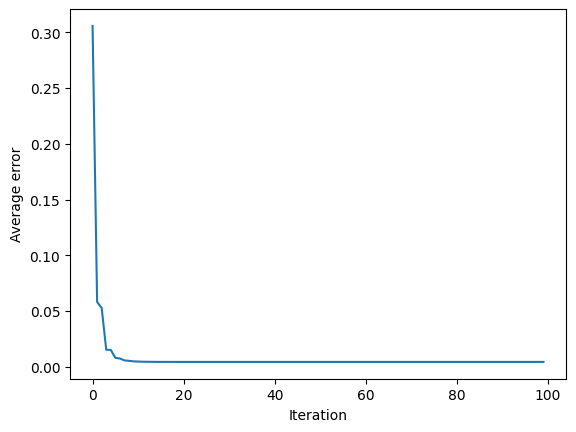

In [11]:
def gradient_descent_err(x, y, iters):
    err = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        err.append(np.mean((theta[0] * x + theta[1] - y)**2))
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return np.array(err)

plt.plot(np.arange(0,100), gradient_descent_err(x_normalized, y_normalized, 100))
plt.xlabel("Iteration")
plt.ylabel("Average error")

It is more informative to plot mean error on a log scale:

As you can see, the error is decreasing linearly with iteration number on the log scale; this means we will reach an optimal setting to numerical precision pretty quickly.

Text(0, 0.5, 'Average error minus optimal')

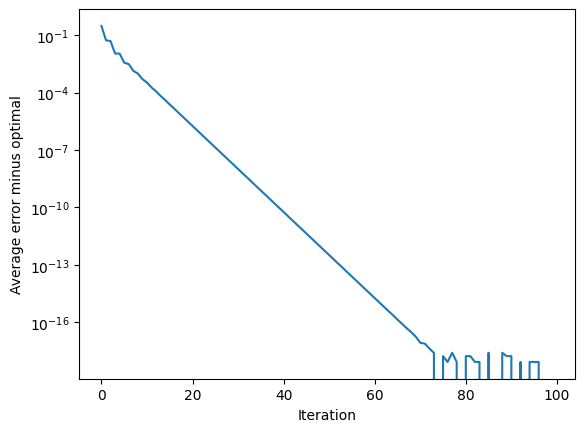

In [12]:
err = gradient_descent_err(x_normalized, y_normalized, 1000)
plt.semilogy(err[:100] - err[-1])
plt.xlabel("Iteration")
plt.ylabel("Average error minus optimal")

## Visualizing parameter updates

C:\Users\vmelnyk2\AppData\Local\Temp\ipykernel_29320\1114937095.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return np.mean((np.outer(x, theta[:,0]) + theta[:,1] - y[:,None])**2,axis=0)


Text(0, 0.5, 'theta2')

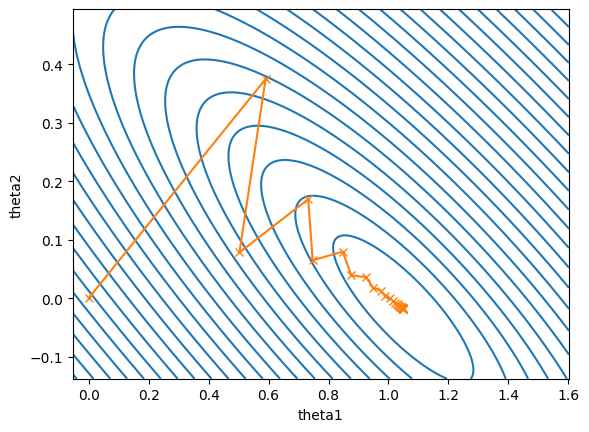

In [13]:
def gradient_descent_params(x, y, iters):
    thetas = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        thetas.append(theta.copy())
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return np.array(thetas)

def err(x, y, theta):
    return np.mean((np.outer(x, theta[:,0]) + theta[:,1] - y[:,None])**2,axis=0)

thetas = gradient_descent_params(x_normalized, y_normalized, 100)
plt.plot(thetas[:,0], thetas[:,1])
xlim, ylim =(np.array(plt.gca().get_xlim()), np.array(plt.gca().get_ylim()))
xlim += np.array([0,0.5])
ylim += np.array([-0.1, 0.1])

XX,YY = np.meshgrid(np.linspace(xlim[0],xlim[1],200), np.linspace(ylim[0], ylim[1],200))
ZZ = err(x_normalized, y_normalized, np.hstack([np.ravel(XX)[:,None], np.ravel(YY)[:,None]])).reshape(XX.shape)
#V = np.logspace(np.log(np.min(ZZ)), np.log(np.max(ZZ)), 30)
V = np.linspace(np.sqrt(np.min(ZZ)), np.sqrt(np.max(ZZ)), 25)**2
plt.clf()
plt.contour(XX,YY,ZZ, V, colors=('C0',))
plt.plot(thetas[:,0], thetas[:,1], 'C1-x')
plt.xlabel("theta1")
plt.ylabel("theta2")

## Getting the answer back in the original coordinates

[ 7758.57937341 34466.89705587]


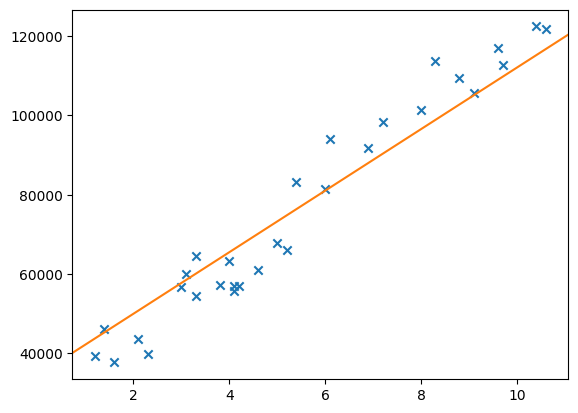

In [14]:
x, y = get_data('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')

theta = gradient_descent(x_normalized, y_normalized, 100, 0.1)
a, b, c, d = min(y), max(y) - min(y), min(x), max(x) - min(x)
theta_hat = np.array([b * theta[0] / d, b*theta[1] + a - c*b*theta[0]/d])
print(theta_hat)


plot_fit(x, y, theta_hat)

## Machine learning

Gradient descent to find the parameters to minimize MSE for a linear model is an 
example of a machine learning algorithm

**Basic idea:** in many domains, it is difficult to hand-build a predictive model, but 
easy to collect lots of data; machine learning provides a way to automatically infer 
the predictive model from data

![graph](../resources/ml-1.png)

### Terminology

Loss function: $l: y × y → R$, measures the difference between a prediction and 
an actual output $$l(y',y)=(y'-y)^{2}$$

The canonical machine learning optimization problem:
$$minimize_{\theta}\sum_{i}l(h_{\theta}(x^{i}), y^{i})$$
Virtually every machine learning algorithm has this form, just specify
- What is the hypothesis function?
- What is the loss function?
- How do we solve the optimization problem?

### Example machine learning algorithms

Note: we have not been consistent in naming 
conventions, many machine learning algorithms actually only specify some of these 
three elements

- Least squares: {linear hypothesis, squared loss, (usually) analytical 
solution}
- Linear regression: {linear hypothesis, *, *}
- Support vector machine: {linear or kernel hypothesis, hinge loss, *}
- Neural network: {Composed non-linear function, *, (usually) gradient 
descent)
- Decision tree: {Hierarchical axis-aligned halfplanes, *, greedy optimization}
- Naïve Bayes: {Linear hypothesis, joint probability under certain 
independence assumptions, analytical solution}

[ 9449.96232146 24848.20396652]
[ 90997.94021671 100447.90253816]


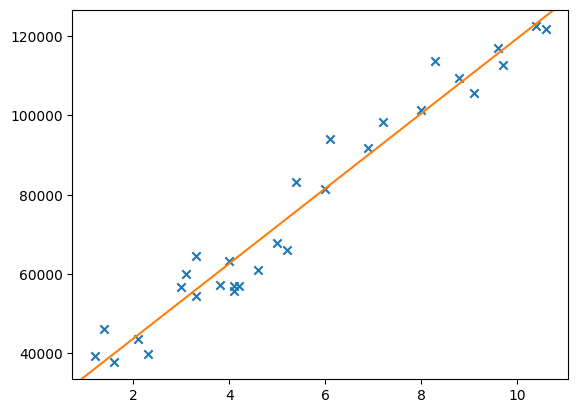

In [16]:
# linear regression in numpy:
import numpy as np

x, y = get_data('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')

x_input = np.array([x, np.ones(len(x))]).T

theta = np.linalg.solve(x_input.T @ x_input, x_input.T @ y)
print(theta)

# predict on new data
x_new = np.array([[7, 1], [8, 1]])
ypred = x_new @ theta
print(ypred)
plot_fit(x, y, theta)

## Linear regression in scikit-learn

In [35]:
from sklearn.linear_model import LinearRegression

# don't include constant term in X
x, y = get_data('../resources/Salary_dataset.csv', 'YearsExperience', 'Salary')
x_reshaped, y_reshaped = x.values.reshape(-1, 1), y.values.reshape(-1, 1)
model = LinearRegression(fit_intercept=True)
model.fit(x_reshaped, y_reshaped)

# predict on new data
Xnew = np.array([[7], [8]])
print(model.predict(Xnew))



[[ 90997.94021671]
 [100447.90253816]]
